In [112]:
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
dataset = "ws_1.pcapng"
df = pd.read_csv("input/ws_1.csv")
df_freq = pd.read_csv("results/frequency.csv")
df_info = pd.read_csv("results/information.csv")
df_entropy = pd.read_csv("results/entropy.csv")


In [114]:
df

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,192.168.0.1,192.168.0.146,DNS,143,Standard query response 0x93c8 HTTPS e6987.a.a...
1,2,0.009068,50.18.194.39,192.168.0.146,TCP,66,443 > 49660 [ACK] Seq=1 Ack=1 Win=442 Len=0 ...
2,3,0.009255,192.168.0.146,50.18.194.39,TLSv1.2,1264,"Application Data, Application Data, Applicatio..."
3,4,0.021385,23.77.220.193,192.168.0.146,TCP,74,"443 > 49665 [SYN, ACK, ECN] Seq=0 Ack=1 Win=..."
4,5,0.021398,23.77.220.193,192.168.0.146,TCP,74,"443 > 49664 [SYN, ACK, ECN] Seq=0 Ack=1 Win=..."
...,...,...,...,...,...,...,...
100408,100409,2431.510487,192.168.0.208,192.168.0.255,UDP,305,54915 > 54915 Len=263
100409,100410,2432.539239,192.168.0.208,192.168.0.255,UDP,305,54915 > 54915 Len=263
100410,100411,2433.558639,192.168.0.208,192.168.0.255,UDP,305,54915 > 54915 Len=263
100411,100412,2434.582528,192.168.0.208,192.168.0.255,UDP,305,54915 > 54915 Len=263


### Apariciones por protocolo

<AxesSubplot:xlabel='Protocol'>

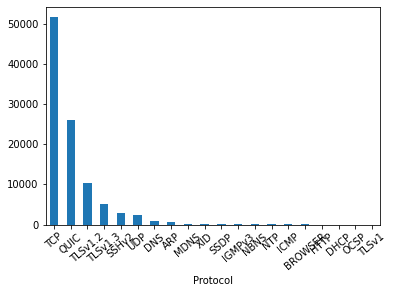

In [115]:
df.value_counts(df.Protocol).plot.bar(rot=40)

<AxesSubplot:xlabel='Protocol'>

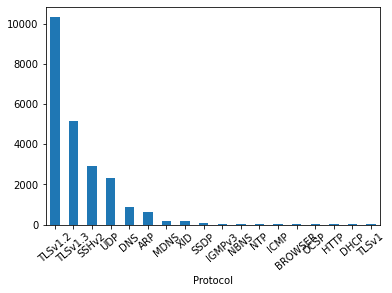

In [116]:
# Remove TCP & QUIC values
df2=df
df2 = df2[df2["Protocol"] != "TCP"]
df2 = df2[df2["Protocol"] != "QUIC"]
df2.value_counts(df.Protocol).plot.bar(rot=40)

### Frecuencia por protocolo

<AxesSubplot:xlabel='Protocol'>

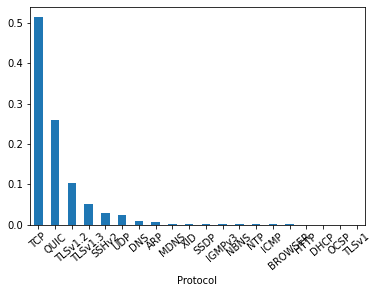

In [117]:

#df["count"] = df.value_counts(df.Protocol)
#df.value_counts(df.Protocol)
df["count"] = df.groupby("Protocol").sum().Length
df.value_counts(df.Protocol, normalize=True).plot.bar(rot=40)


In [118]:
df_entropy[df_entropy["dataset"]==dataset]["value"].item()

0.127615780451732

# Informacion por protocolo

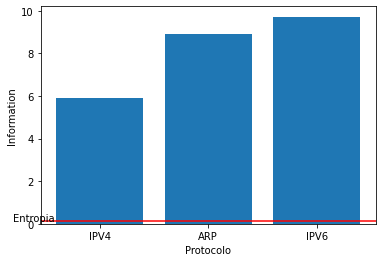

In [119]:
plt.bar(df_info["type"], df_info["value"])
plt.xlabel("Protocolo")
plt.ylabel("Information")
entropy = df_entropy[df_entropy["dataset"]==dataset]["value"].item()
plt.axhline(y=entropy, color='r', linestyle='-')
plt.text(-0.8,entropy,'Entropia')
plt.show()

In [120]:
df_freq

,type,value
0,IPV4,0.016474
1,ARP,0.002080
2,IPV6,0.001183
